# Lead Scoring Case Study
To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

In [317]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [318]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing and reading data for inspection and cleaning


In [786]:
#Reading data from csv file using pandas
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [787]:
#Code for inspecting columns and shape
leads.columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Inspect Null values

Nulls in each column

In [788]:
# Code for column-wise null count 
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [789]:
# Code to convert Select to null values
#leads = leads['Specialization','How did you hear about X Education','Lead Profile','City'].replace('Select', np.nan)
leads = leads.replace('Select', np.nan)

In [790]:
# Code for column-wise null percentage
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping columns having more than 30% of nulls

In [791]:
# Code for dropping the irrelevant columns 
leads = leads.drop('How did you hear about X Education', axis=1)
leads = leads.drop('Specialization', axis=1)
leads = leads.drop('Tags', axis=1)
leads = leads.drop('Lead Quality', axis=1)
leads = leads.drop('Lead Profile', axis=1)
leads = leads.drop('City', axis=1)
leads = leads.drop('Asymmetrique Activity Index', axis=1)
leads = leads.drop('Asymmetrique Profile Index', axis=1)
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [792]:
#Checking the frequency of values in country
round((leads['Country'].value_counts()/leads['Country'].count())*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
France                   0.09
Oman                     0.09
unknown                  0.07
Canada                   0.06
South Africa             0.06
Nigeria                  0.06
Kuwait                   0.06
Germany                  0.06
Sweden                   0.04
Philippines              0.03
Asia/Pacific Region      0.03
Bangladesh               0.03
Uganda                   0.03
Netherlands              0.03
Italy                    0.03
China                    0.03
Ghana                    0.03
Belgium                  0.03
Russia                   0.01
Kenya                    0.01
Switzerland              0.01
Vietnam                  0.01
Indonesia                0.01
Tanzania  

In [793]:
#Removing country column as more than 95% values are India and it does not capture any information.
leads = leads.drop('Country', axis=1)

In [794]:
#Checking the frequency of values in 'What is your current occupation'
round((leads['What is your current occupation'].value_counts()/leads['What is your current occupation'].count())*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [795]:
#Checking the frequency of values in 'What matters most to you in choosing a course'
round((leads['What matters most to you in choosing a course'].value_counts()/leads['What matters most to you in choosing a course'].count())*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [796]:
#Removing above two columns as they do not capture much variance and also the null values are high in these columns.
leads = leads.drop('What is your current occupation', axis=1)
leads = leads.drop('What matters most to you in choosing a course', axis=1)

In [797]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [798]:
# Code for dropping the rows for which have null values.
leads = leads[~np.isnan(leads['TotalVisits'])]
leads = leads[~np.isnan(leads['Page Views Per Visit'])]
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [799]:
leads = leads[pd.notnull(leads['Lead Source'])]
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [800]:
leads.shape

(9074, 24)

### We have dropped all the nulls from the data and we still have more than 98% of data with us.
Now we will drop all columns which have same value in coulumn for every row in dataset.
### Columns which does not have much variance involved with the data.

In [801]:
round((leads['Do Not Email'].value_counts()/leads['Do Not Email'].count())*100,2)

No     92.11
Yes     7.89
Name: Do Not Email, dtype: float64

In [802]:
round((leads['Do Not Call'].value_counts()/leads['Do Not Call'].count())*100,2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [803]:
round((leads['Search'].value_counts()/leads['Search'].count())*100,2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [804]:
round((leads['Magazine'].value_counts()/leads['Magazine'].count())*100,2)

No    100.0
Name: Magazine, dtype: float64

In [805]:
round((leads['Newspaper Article'].value_counts()/leads['Newspaper Article'].count())*100,2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [806]:
round((leads['X Education Forums'].value_counts()/leads['X Education Forums'].count())*100,2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [807]:
round((leads['Newspaper'].value_counts()/leads['Newspaper'].count())*100,2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [808]:
round((leads['Digital Advertisement'].value_counts()/leads['Digital Advertisement'].count())*100,2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [809]:
round((leads['Through Recommendations'].value_counts()/leads['Through Recommendations'].count())*100,2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [810]:
round((leads['Receive More Updates About Our Courses'].value_counts()/leads['Receive More Updates About Our Courses'].count())*100,2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [811]:
round((leads['Update me on Supply Chain Content'].value_counts()/leads['Update me on Supply Chain Content'].count())*100,2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [812]:
round((leads['Get updates on DM Content'].value_counts()/leads['Get updates on DM Content'].count())*100,2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [813]:
round((leads['I agree to pay the amount through cheque'].value_counts()/leads['I agree to pay the amount through cheque'].count())*100,2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [814]:
round((leads['A free copy of Mastering The Interview'].value_counts()/leads['A free copy of Mastering The Interview'].count())*100,2)

No     68.17
Yes    31.83
Name: A free copy of Mastering The Interview, dtype: float64

#### Dropping all the columns which do not capture any variance 

In [815]:
leads = leads.drop('Do Not Call', axis=1)
leads = leads.drop('Search', axis=1)
leads = leads.drop('Magazine', axis=1)
leads = leads.drop('Newspaper Article', axis=1)
leads = leads.drop('X Education Forums', axis=1)
leads = leads.drop('Newspaper', axis=1)
leads = leads.drop('Digital Advertisement', axis=1)
leads = leads.drop('Through Recommendations', axis=1)
leads = leads.drop('Receive More Updates About Our Courses', axis=1)
leads = leads.drop('Update me on Supply Chain Content', axis=1)
leads = leads.drop('Get updates on DM Content', axis=1)
leads = leads.drop('I agree to pay the amount through cheque', axis=1)

In [816]:
leads.shape

(9074, 12)

In [817]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


In [818]:
# Converting Yes to 1 and No to 0
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0})
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


#### Checking for duplicates

In [819]:
# Dropping Prospect ID as prospect id and lead number are unique We will take lead number as key here to evaluate
leads = leads.drop('Prospect ID', axis=1)

In [820]:
#leads['Lead Number']=leads['Lead Number'].apply(lambda x: x.strip().lower())
print(any(leads['Lead Number'].duplicated())) 

False


#### Dummy variable creation

In [821]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lead_origin = pd.get_dummies(leads['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,lead_origin],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
lead_source = pd.get_dummies(leads['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,lead_source],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
last_activity = pd.get_dummies(leads['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,last_activity],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
last_notble_activity = pd.get_dummies(leads['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,last_notble_activity],axis=1)

In [822]:
leads.shape

(9074, 65)

In [823]:
#Dropping original features.
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], axis=1)

In [824]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [825]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 61 columns):
Lead Number                                           9074 non-null int64
Do Not Email                                          9074 non-null int64
Converted                                             9074 non-null int64
TotalVisits                                           9074 non-null float64
Total Time Spent on Website                           9074 non-null int64
Page Views Per Visit                                  9074 non-null float64
A free copy of Mastering The Interview                9074 non-null int64
Lead Origin_Landing Page Submission                   9074 non-null uint8
Lead Origin_Lead Add Form                             9074 non-null uint8
Lead Origin_Lead Import                               9074 non-null uint8
Lead Source_Direct Traffic                            9074 non-null uint8
Lead Source_Facebook                                  9074 non-null uint8
L

#### Checking outliers

In [826]:
# Checking for outliers in the continuous variables
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [827]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


#### We can see outliers in Total visits and Page views per visit . We will treat these outliers now.

In [828]:
filt_leads_df = leads[['TotalVisits','Page Views Per Visit']]
low = .00
high = .99
quant_df = filt_leads_df.quantile([low, high])
quant_df

,TotalVisits,Page Views Per Visit
0.00,0.0,0.0
0.99,17.0,9.0


In [829]:
filt_leads_df = filt_leads_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)

In [830]:
#Merging with the leads dataframe
leads = pd.concat([leads.loc[:, ~leads.columns.isin(['TotalVisits','Page Views Per Visit'])], filt_leads_df], axis=1)

In [831]:
#Dropping NA values
leads.dropna(inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 61 columns):
Lead Number                                           8924 non-null int64
Do Not Email                                          8924 non-null int64
Converted                                             8924 non-null int64
Total Time Spent on Website                           8924 non-null int64
A free copy of Mastering The Interview                8924 non-null int64
Lead Origin_Landing Page Submission                   8924 non-null uint8
Lead Origin_Lead Add Form                             8924 non-null uint8
Lead Origin_Lead Import                               8924 non-null uint8
Lead Source_Direct Traffic                            8924 non-null uint8
Lead Source_Facebook                                  8924 non-null uint8
Lead Source_Google                                    8924 non-null uint8
Lead Source_Live Chat                                 8924 non-null uint8
Lead 

In [832]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_leads2 = leads[['TotalVisits','Page Views Per Visit']]
num_leads2.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Page Views Per Visit
count,8924.000000,8924.00000
mean,3.153070,2.27400
std,2.903138,1.89403
min,0.000000,0.00000
25%,1.000000,1.00000
50%,3.000000,2.00000
75%,5.000000,3.00000
90%,7.000000,5.00000
95%,9.000000,6.00000
99%,13.000000,8.00000


#### We have remove the outliers now and number of rows is also 8924 which is around 97% of original data. Now we can find correlation between items and do RFE after that.

##### Checking for variance for dummy variables

In [833]:
x = round(100*((len(leads.index)-leads.loc[:, ~leads.columns.isin(['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit'])].sum())/len(leads.index)), 2)
df_x = pd.DataFrame(x,columns=['val'])
df_x

,val
Do Not Email,92.28
Converted,62.25
A free copy of Mastering The Interview,68.65
Lead Origin_Landing Page Submission,46.57
Lead Origin_Lead Add Form,93.50
Lead Origin_Lead Import,99.66
Lead Source_Direct Traffic,72.00
Lead Source_Facebook,99.65
Lead Source_Google,68.22
Lead Source_Live Chat,99.98


#### We saw most of the columns above do anot capture any variance so we will drop all the variables having 99% same values

In [834]:
col = (df_x[df_x['val'] > 98.50]).index.values.tolist()  
col
#leads = leads.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)

['Lead Origin_Lead Import',
 'Lead Source_Facebook',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_google',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Received',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Resubscribed to emails',
 'Last Activity_Unreachable',
 'Last Activity_Unsubscribed',
 'Last Activity_View in browser link Clicked',
 'Last Activity_Visited Booth in Tradeshow',
 'Last Notable Activity_Email Bounced',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Email Received',
 'Last Notable Activity_Form Submitted on Website',
 'Last Notable Activity_Had a Phone C

In [835]:
# Dropping all columns which do not capture any variance
leads = leads.drop(col, 1)

In [836]:
leads.shape

(8924, 27)

#### Feature Standardisation

In [837]:
# Normalising continuous features
df = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [838]:
normalized_df=(df-df.mean())/df.std()
leads = leads.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
leads = pd.concat([leads,normalized_df],axis=1)
leads.head()

,Lead Number,Do Not Email,Converted,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,-1.086091,-0.880426,-1.200615
1,660728,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0.636184,0.357676,0.119322
2,660727,0,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,-0.397181,1.933776,-0.144665
3,660719,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,-0.741636,-0.320157,-0.672640
4,660681,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,-0.397181,1.742733,-0.672640


#### Checking the lead conversion rate

In [839]:
lead_conv = (sum(leads['Converted'])/len(leads['Converted'].index))*100
lead_conv

37.75212909009413

#### We have 37 % lead conversion rate in our dataset and we can proceed to build our model now.

### Model Building
Let's start by splitting our data into a training set and a test set.

In [840]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'],axis=1)

# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [841]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


#### Running Your First Training Model

In [842]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6220
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.8
Date:                Fri, 07 Jun 2019   Deviance:                       5431.6
Time:                        21:57:33   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4527      0.399      1.136      0.256      -0.329       1.234
Do Not Email                                     -1.5186      0.209     -7.278      0.000      -1.928      -1.110
A free copy of Mastering The Interview           -0.0094      0.105     -0.089      0.929      -0.216       0.197
Lead Origin_Landing Page Submission              -0.0468      0.104     -0.449      0.653      -0.251       0.158
Lead Origin_Lead Add Form                         4.7465      0.584      8.125      0.000       3.602       5.892
Lead Source_Direct Traffic                       -0.2267      0.272     -0.832      0.405      -0.761       0.307
Lead Source_Google                                0.1078      0.260      0.415      0.678      -0.401       0.617
Lead Source_Olark Chat                            0.9542      0.273      3.490      0.000       0.418       1.490
Lead Source_Organic Search                        0.0259      0.272      0.095      0.924      -0.507       0.559
Lead Source_Reference                            -0.6992      0.566     -1.234      0.217      -1.809       0.411
Last Activity_Converted to Lead                  -0.7737      0.303     -2.554      0.011      -1.367      -0.180
Last Activity_Email Bounced                      -1.2032      0.450     -2.674      0.007      -2.085      -0.321
Last Activity_Email Link Clicked                 -0.0464      0.400     -0.116      0.908      -0.831       0.738
Last Activity_Email Opened                        0.2692      0.252      1.067      0.286      -0.225       0.763
Last Activity_Olark Chat Conversation            -1.2936      0.286     -4.527      0.000      -1.854      -0.734
Last Activity_Page Visited on Website            -0.2679      0.298     -0.898      0.369      -0.853       0.317
Last Activity_SMS Sent                            0.4949      0.257      1.926      0.054      -0.009       0.999
Last Notable Activity_Email Link Clicked         -1.8697      0.547     -3.417      0.001      -2.942      -0.797
Last Notable Activity_Email Opened               -1.7270      0.385     -4.486      0.000      -2.481      -0.972
Last Notable Activity_Modified                   -1.9326      0.361     -5.355      0.000      -2.640      -1.225
Last Notable Activity_Olark Chat Conversation    -1.7611      0.499     -3.528      0.000      -2.739      -0.783
Last Notable Activity_Page Visited on Website    -1.8028      0.455     -3.962      0.000      -2.695      -0.911
Last Notable Activity_SMS Sent                   -0.4102      0.390     -1.052      0.293      -1.174       0.354
TotalVisits                                       0.3051      0.051      6.015      0.000       0.206       0.405
Total Time Spent on Website                       1.1017      0.040     27.867      

#### Correlation matrix

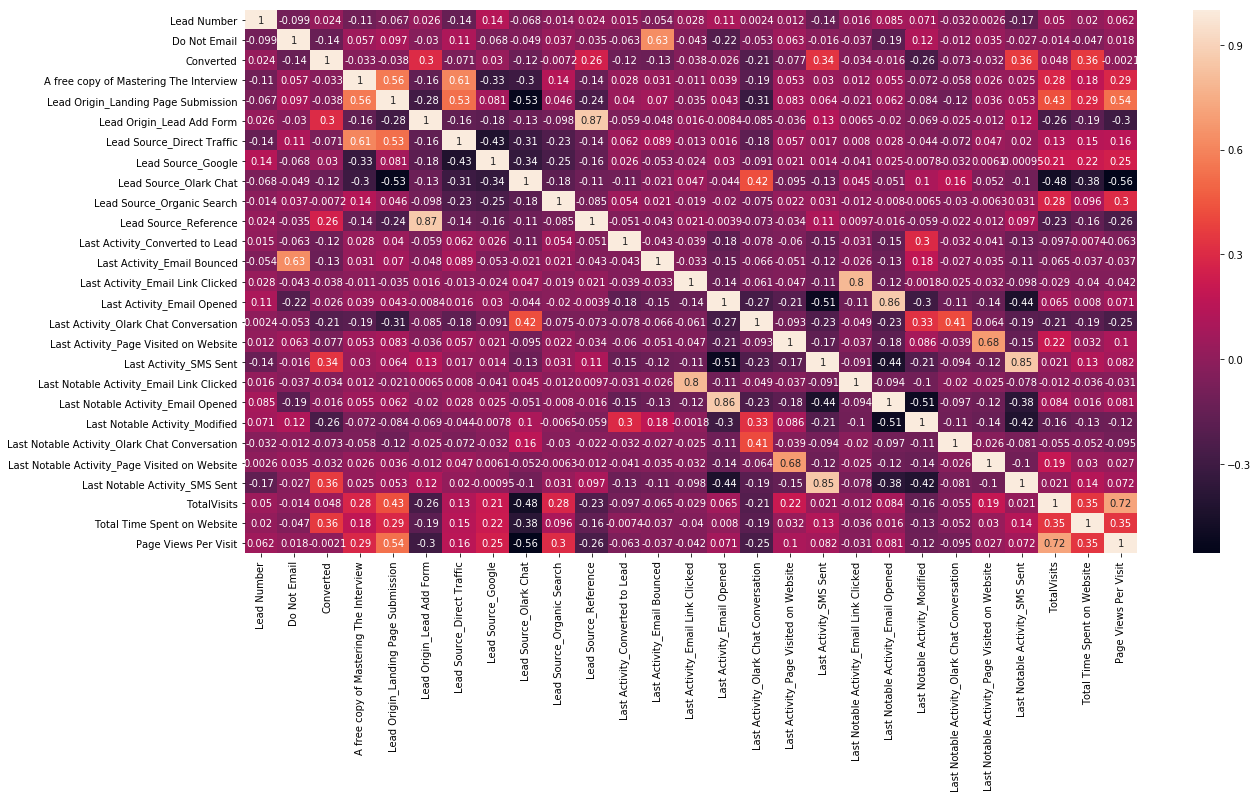

In [843]:
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)

#### Dropping the correlated variables

In [844]:
X_test = X_test.drop(['Lead Source_Reference','Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Page Views Per Visit',
                       'Last Activity_Page Visited on Website','Last Activity_Email Bounced'], 1)
X_train = X_train.drop(['Lead Source_Reference','Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Page Views Per Visit',
                       'Last Activity_Page Visited on Website','Last Activity_Email Bounced'], 1)

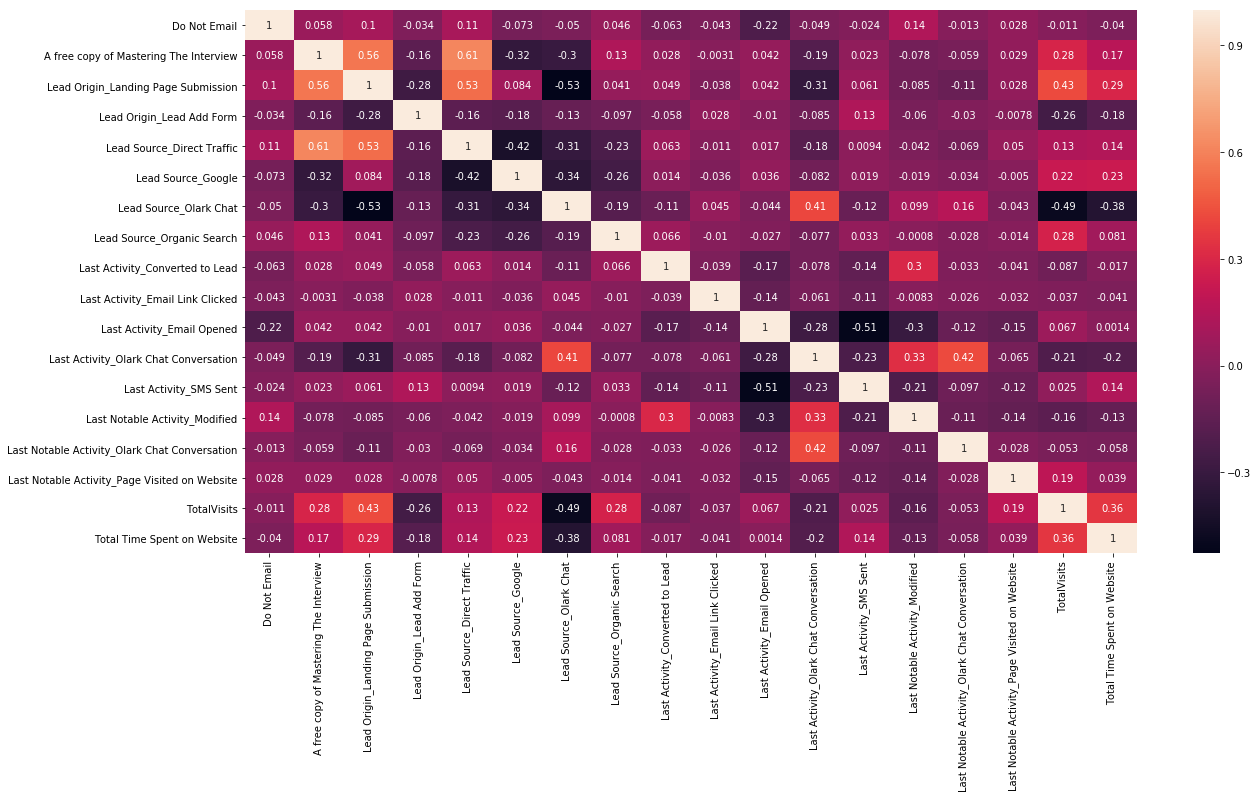

In [845]:
# Checking correlation matrix again
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [846]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.6
Date:                Fri, 07 Jun 2019   Deviance:                       5525.2
Time:                        21:57:39   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6462      0.292     -2.213      0.027      -1.219      -0.074
Do Not Email                                     -1.5493      0.182     -8.512      0.000      -1.906      -1.193
A free copy of Mastering The Interview            0.0142      0.104      0.137      0.891      -0.189       0.218
Lead Origin_Landing Page Submission              -0.1894      0.100     -1.901      0.057      -0.385       0.006
Lead Origin_Lead Add Form                         4.4367      0.329     13.480      0.000       3.792       5.082
Lead Source_Direct Traffic                       -0.1727      0.271     -0.637      0.524      -0.704       0.359
Lead Source_Google                                0.1236      0.259      0.477      0.633      -0.384       0.631
Lead Source_Olark Chat                            1.1784      0.270      4.365      0.000       0.649       1.707
Lead Source_Organic Search                       -0.0629      0.270     -0.232      0.816      -0.593       0.467
Last Activity_Converted to Lead                  -0.6298      0.247     -2.554      0.011      -1.113      -0.146
Last Activity_Email Link Clicked                 -0.5476      0.241     -2.273      0.023      -1.020      -0.075
Last Activity_Email Opened                       -0.2589      0.156     -1.658      0.097      -0.565       0.047
Last Activity_Olark Chat Conversation            -1.2375      0.225     -5.503      0.000      -1.678      -0.797
Last Activity_SMS Sent                            1.0401      0.154      6.774      0.000       0.739       1.341
Last Notable Activity_Modified                   -0.8846      0.095     -9.268      0.000      -1.072      -0.698
Last Notable Activity_Olark Chat Conversation    -0.6652      0.354     -1.880      0.060      -1.359       0.028
Last Notable Activity_Page Visited on Website    -0.8210      0.241     -3.402      0.001      -1.294      -0.348
TotalVisits                                       0.1784      0.044      4.016      0.000       0.091       0.266
Total Time Spent on Website                       1.1003      0.039     28.103      0.000       1.024       1.177
=================================================================================================================
"""

#### Feature selection using RFE

In [847]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [848]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Page Visited on Website', True, 1),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1)]

In [849]:
col = X_train.columns[rfe.support_]

In [850]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'TotalVisits'],
      dtype='object')

In [851]:
# Assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.3
Date:                Fri, 07 Jun 2019   Deviance:                       5568.6
Time:                        21:57:39   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9747      0.055    -17.599      0.000      -1.083      -0.866
Do Not Email                                     -1.5237      0.172     -8.879      0.000      -1.860      -1.187
Lead Origin_Lead Add Form                         4.2976      0.211     20.323      0.000       3.883       4.712
Lead Source_Olark Chat                            1.0706      0.098     10.902      0.000       0.878       1.263
Last Activity_Converted to Lead                  -0.5899      0.220     -2.676      0.007      -1.022      -0.158
Last Activity_Olark Chat Conversation            -1.0029      0.197     -5.097      0.000      -1.389      -0.617
Last Activity_SMS Sent                            1.2601      0.073     17.184      0.000       1.116       1.404
Last Notable Activity_Modified                   -0.8198      0.086     -9.556      0.000      -0.988      -0.652
Last Notable Activity_Olark Chat Conversation    -0.5432      0.348     -1.561      0.119      -1.225       0.139
Last Notable Activity_Page Visited on Website    -0.4263      0.189     -2.257      0.024      -0.796      -0.056
Total Time Spent on Website                       1.1161      0.039     28.670      0.000       1.040       1.192
=================================================================================================================
"""

In [852]:
#Dropping Last Notable Activity_Olark Chat Conversation as p value is greater than 0.05
col = [cl for cl in X_train.columns[rfe.support_] if cl != "Last Notable Activity_Olark Chat Conversation"]
# Assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.5
Date:                Fri, 07 Jun 2019   Deviance:                       5571.1
Time:                        21:57:40   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9818      0.055    -17.779      0.000      -1.090      -0.874
Do Not Email                                     -1.5295      0.171     -8.934      0.000      -1.865      -1.194
Lead Origin_Lead Add Form                         4.2843      0.211     20.303      0.000       3.871       4.698
Lead Source_Olark Chat                            1.0701      0.098     10.899      0.000       0.878       1.263
Last Activity_Converted to Lead                  -0.6163      0.220     -2.807      0.005      -1.047      -0.186
Last Activity_Olark Chat Conversation            -1.1845      0.166     -7.119      0.000      -1.511      -0.858
Last Activity_SMS Sent                            1.2609      0.073     17.215      0.000       1.117       1.404
Last Notable Activity_Modified                   -0.7846      0.082     -9.511      0.000      -0.946      -0.623
Last Notable Activity_Page Visited on Website    -0.4172      0.189     -2.211      0.027      -0.787      -0.047
Total Time Spent on Website                       1.1130      0.039     28.661      0.000       1.037       1.189
=================================================================================================================
"""

#### Checking VIF

In [853]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Notable Activity_Modified,1.75
2,Lead Source_Olark Chat,1.58
4,Last Activity_Olark Chat Conversation,1.58
8,Total Time Spent on Website,1.25
3,Last Activity_Converted to Lead,1.23
5,Last Activity_SMS Sent,1.21
1,Lead Origin_Lead Add Form,1.15
0,Do Not Email,1.12
7,Last Notable Activity_Page Visited on Website,1.02


In [854]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.642879
6138    0.724626
8650    0.585302
3423    0.054134
6552    0.290779
1696    0.135939
2110    0.391457
6830    0.029637
2581    0.271317
5927    0.095167
dtype: float64

In [855]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64287894, 0.72462584, 0.58530183, 0.0541337 , 0.29077856,
       0.13593926, 0.39145738, 0.02963686, 0.27131655, 0.09516683])

#### Creating a dataframe with actual converted value and probability of conversion

In [856]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convertion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number
0,1,0.642879,6676
1,1,0.724626,6138
2,1,0.585302,8650
3,0,0.054134,3423
4,0,0.290779,6552


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [857]:
y_train_pred_final['predicted'] = y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final.Convertion_Prob.map(lambda x: round(x*100,0))
# Let's see the head
y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number,predicted,Lead Score
0,1,0.642879,6676,1,64.0
1,1,0.724626,6138,1,72.0
2,1,0.585302,8650,1,59.0
3,0,0.054134,3423,0,5.0
4,0,0.290779,6552,0,29.0


### Here we have calculated the lead score for each value in dataset.

In [858]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3390  481]
 [ 784 1591]]


In [859]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.797470381043868


#### Advanced Metrics beyond simply accuracy

In [860]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [861]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.6698947368421052

In [862]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.8757427021441488

In [863]:
# Calculate false postive rate - predicting conversion when customer have not converted
FPR=FP/ float(TN+FP)
FPR

0.1242572978558512

In [864]:
# positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.7678571428571429

In [865]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.812170579779588

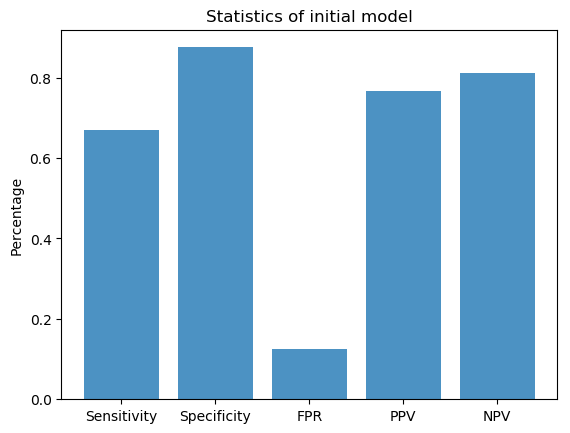

In [867]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of initial model')

plt.show()

#### Plotting the ROC Curve

In [868]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [869]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob, drop_intermediate = False )

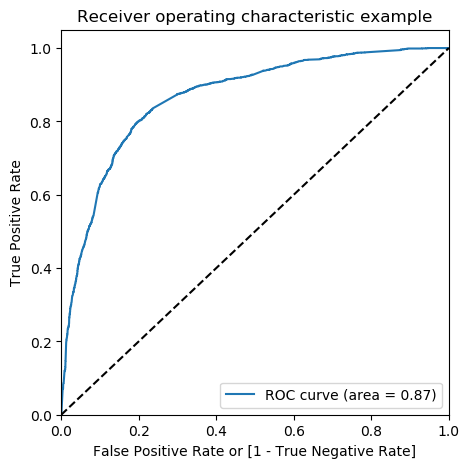

In [870]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob)

#### Finding Optimal Cutoff Point

In [871]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.642879,6676,1,64.0,1,1,1,1,1,1,1,0,0,0
1,1,0.724626,6138,1,72.0,1,1,1,1,1,1,1,1,0,0
2,1,0.585302,8650,1,59.0,1,1,1,1,1,1,0,0,0,0
3,0,0.054134,3423,0,5.0,1,0,0,0,0,0,0,0,0,0
4,0,0.290779,6552,0,29.0,1,1,1,0,0,0,0,0,0,0


In [872]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.571886  0.971789  0.326531
0.2   0.2  0.713577  0.906947  0.594937
0.3   0.3  0.790906  0.831579  0.765952
0.4   0.4  0.802434  0.755789  0.831051
0.5   0.5  0.797470  0.669895  0.875743
0.6   0.6  0.774576  0.539789  0.918626
0.7   0.7  0.757925  0.454316  0.944200
0.8   0.8  0.731028  0.348632  0.965642
0.9   0.9  0.690202  0.207579  0.986308


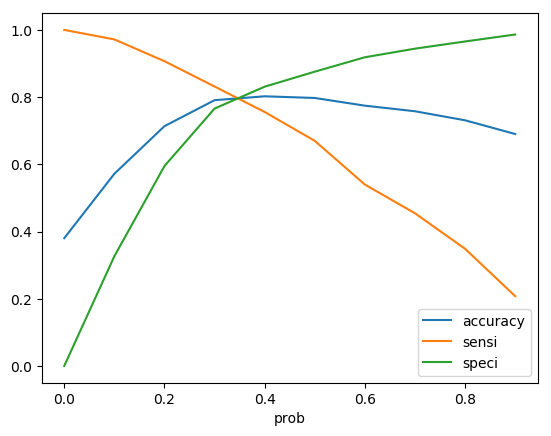

In [873]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability

In [874]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convertion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.642879,6676,1,64.0,1,1,1,1,1,1,1,0,0,0,1
1,1,0.724626,6138,1,72.0,1,1,1,1,1,1,1,1,0,0,1
2,1,0.585302,8650,1,59.0,1,1,1,1,1,1,0,0,0,0,1
3,0,0.054134,3423,0,5.0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.290779,6552,0,29.0,1,1,1,0,0,0,0,0,0,0,0


In [875]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7952289465257765

In [876]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3024,  847],
       [ 432, 1943]], dtype=int64)

In [877]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [878]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.8181052631578948

In [879]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.7811934900542495

In [880]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

0.21880650994575046

In [881]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.696415770609319

In [882]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.875

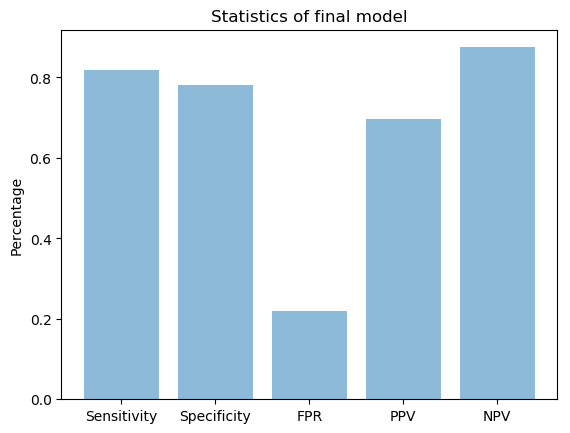

In [883]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of final model')

plt.show()

#### We can see that we have increased the sensitivity of our initial model and now our model is more stable.
#### From above stats we can see that we have achieve overall accuracy of 80 % and also no of yes and no predicted correctly is also around 80% so this is suitable model for our analysis.

#### Finding top 3 features in original data on which our model depends

In [885]:
print(res.params)

const                                           -0.981767
Do Not Email                                    -1.529523
Lead Origin_Lead Add Form                        4.284273
Lead Source_Olark Chat                           1.070103
Last Activity_Converted to Lead                 -0.616319
Last Activity_Olark Chat Conversation           -1.184456
Last Activity_SMS Sent                           1.260857
Last Notable Activity_Modified                  -0.784583
Last Notable Activity_Page Visited on Website   -0.417174
Total Time Spent on Website                      1.113031
dtype: float64


### We can see that only 2 features from original dataset are important in evaluating the lead conversion. Following are two features.
 1. Do Not Email
 2. Total Time Spent on Website
 
### The features having higher coefficient values are more important in predicting the lead conversion. Following are the three dummy variables which help in lead conversion
 1. Lead Origin_Lead Add Form
 2. Lead Source_Olark Chat
 3. Last Activity_SMS Sent
